In [ ]:
#Basic Scikit learn codes
'''from sklearn import datasets
digits = datasets.load_digits()
print(digits)'''

In [ ]:
'''import pandas as pd
digits = pd.read_csv("optdigits.tra", header=None)
print(digits)'''

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv('data.csv' ,delim_whitespace=True)
x_train = df['Father'].values[:,np.newaxis]
y_train = df['Son'].values
lm = LinearRegression()
lm.fit(x_train, y_train) #train the model

x_test = [[72.8],[61.1],[67.4],[70.2],[75.6],[60.2],[65.3],[59.2]]

predictions = lm.predict(x_test)

print predictions

plt.scatter(x_train, y_train,color='b')

plt.plot(x_test, predictions,color='black',linewidth=3)
plt.xlabel('Father height in inches')  
plt.ylabel('Son height in inches') 
plt.show()

In [ ]:
#naive bayes
'''
Dataset of patients who had undergone 
surgery for breast cancer. 

Age - Age of patient at time of operation.
Year - Patient's year of operation (year - 1900).
Nodes - Number of positive axillary nodes detected.

Class(Survived): 
1 - the patient survived 5 years or longer
2 - the patient died within 5 year
'''

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Import the sklearn library for Naive bayes
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('data_naive_bayes.csv')

plt.xlabel('Feature')
plt.ylabel('Survived') 

X = df.loc[:,'Age']
Y = df.loc[:,'Survived']
plt.scatter(X, Y,color='blue',label='Age')

X = df.loc[:,'Year']
Y = df.loc[:,'Survived']
plt.scatter(X, Y,color='green',label='Year')

X = df.loc[:,'Nodes']
Y = df.loc[:,'Survived']
plt.scatter(X, Y,color='red',label='Nodes')

plt.legend(loc=4, prop={'size': 7})
plt.show()

# Prepare the training set
X = df.loc[:,'Age':'Nodes']
Y = df.loc[:,'Survived']

clf = GaussianNB()

# Train the model
clf.fit(X,Y)

# Test the model(return the class)
prediction = clf.predict([[12,70,12],[13,20,13]])

print prediction


In [ ]:
#Decision Tree
'''
buying         4 - vhigh, 3 - high, 2 - med, 1 - low
maint          4 - vhigh, 3 - high, 2 - med, 1 - low
doors          2, 3, 4, 5
persons        2, 4, 5
lug_boot       1 - small, 2 - med, 3 - big
safety         l - low, 2 - med, 3 - high
 
class          unacc acc good vgood  
'''
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('data_decision_tree.csv')

X_train = df.loc[:,'buying':'safety']
Y_train = df.loc[:,'values']
tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
tree.fit(X_train, Y_train)
prediction = tree.predict([[4,3,2,1,2,3]])

print prediction  

[0 0 1 0 1 0]


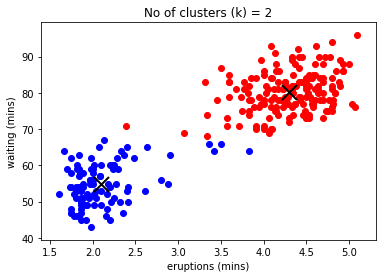

In [17]:
#k means clustering
'''
eruptions - eruptions time in minutes
waiting - waiting time to next eruption 
            in minutes'''

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

df = pd.read_csv('data_kmeans.csv')
k = 2 # Assign the number of clusters

kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(df)

labels = kmeans.labels_ # array that contains cluster number 

centroids = kmeans.cluster_centers_ ## array of size k with co-ordinates of centroids 

# Prepare the test data 
x_test = [[4.671,67],[2.885,61],[1.666,90],[5.623,54],[2.678,80],[1.875,60]]

prediction = kmeans.predict(x_test)

print prediction

# Plot the points representing their cluster
# cluster number 
colors = ['blue','red','green','black']
y = 0
for x in labels:
    # plot the points acc to their clusters
    # and assign different colors
    plt.scatter(df.iloc[y,0], df.iloc[y,1],color=colors[x])
    y+=1
        
for x in range(k):
    #plot the centroids
    lines = plt.plot(centroids[x,0],centroids[x,1],'kx')    
    #make the centroid larger    
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    
title = ('No of clusters (k) = {}').format(k)
plt.title(title)
plt.xlabel('eruptions (mins)')
plt.ylabel('waiting (mins)')
plt.show()